In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.dtypes

CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [10]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df[["Age", "Annual_Income_(k$)", "Spending_Score"]])

In [21]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,12):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

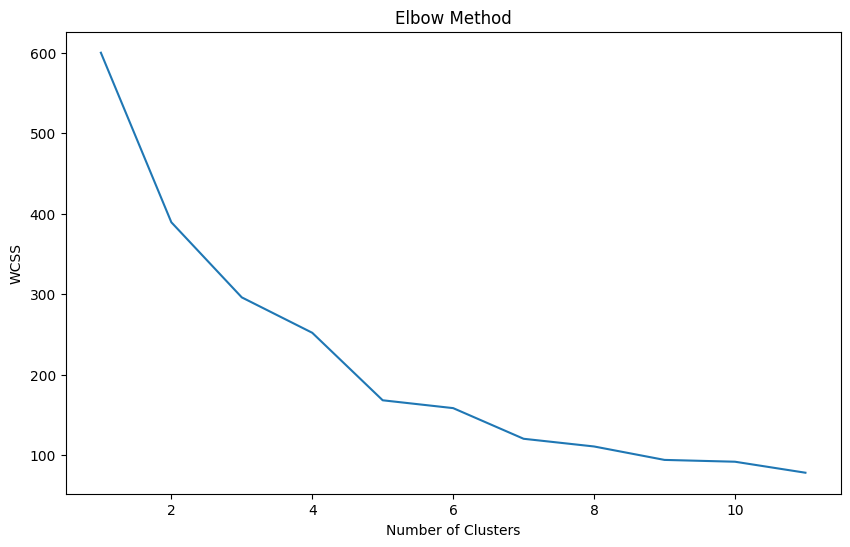

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,12),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans=KMeans(n_clusters=6,init='k-means++')
labels=kmeans.fit_predict(scaled_data)
# Add cluster labels to the original DataFrame
df["Cluster"] = labels

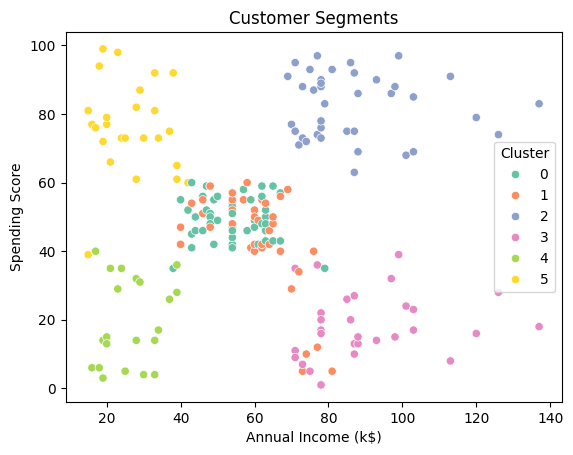

In [29]:
# Create a 2D scatter plot for two features
sns.scatterplot(x=df["Annual_Income_(k$)"], y=df["Spending_Score"], hue=df["Cluster"], palette="Set2")
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()